##1. Importação dos dados.

In [344]:
import pandas as pd

url = 'https://raw.githubusercontent.com/DevCalann/Telecom-X-2-churn-ml/refs/heads/main/df_clean.csv'
df = pd.read_csv(url)

# Verifique os dados
print(df.shape)
df.head()


(7032, 21)


,CustomerID,ChurnStatus,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [345]:
df['ChurnStatus'] = df['ChurnStatus'].map({'No': 0, 'Yes': 1})

##2. Verificação inicial e Limpeza final.

In [346]:
df.isna() .sum()

,0
CustomerID,0
ChurnStatus,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [347]:
#Nulos=0

In [348]:
# Verificar colunas disponíveis
print(df.columns)

# Remover CustomerID se estiver presente
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)
    print('CustomerID removido.')


Index(['CustomerID', 'ChurnStatus', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')
CustomerID removido.


##3. Separação de variáveis e codificação.

In [349]:
# Separar target e features
y = df['ChurnStatus']
X = df.drop('ChurnStatus', axis=1)

# One-hot encoding nas variáveis categóricas
X_encoded = pd.get_dummies(X)

# Verificar resultado
print(f'Formato após codificação: {X_encoded.shape}')
X_encoded.head()

Formato após codificação: (7032, 45)


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,True,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
1,0,9,59.9,542.40,False,True,True,False,True,False,...,True,True,False,False,True,False,False,False,False,True
2,0,4,73.9,280.85,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,1,13,98.0,1237.85,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
4,1,3,83.9,267.40,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


##4. Proporção de Churn e avaliação de balanceamento.

Contagem de ChurnStatus:
ChurnStatus
0    5163
1    1869
Name: count, dtype: int64

Proporção de cada classe:
ChurnStatus
0    0.734215
1    0.265785
Name: count, dtype: float64


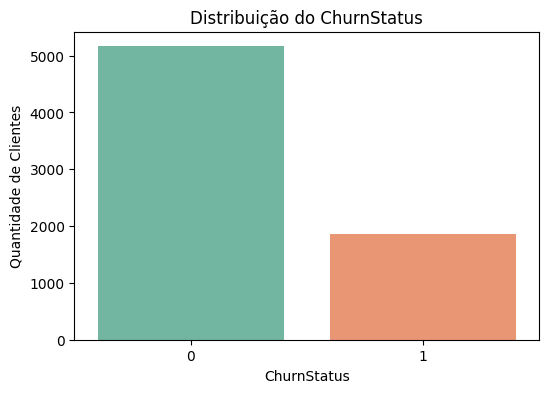

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem das classes
churn_counts = y.value_counts()
print('Contagem de ChurnStatus:')
print(churn_counts)

# Proporção
churn_proportion = churn_counts / len(y)
print('\nProporção de cada classe:')
print(churn_proportion)

# Criar uma cópia nomeada da variável alvo
y_named = y.copy()
y_named.name = 'ChurnStatus'  # atribuir nome para uso no hue

# Gráfico ajustado sem aviso
plt.figure(figsize=(6,4))
sns.countplot(x=y_named, hue=y_named, palette='Set2')  # usar y_named
plt.legend().remove()  # agora a legenda pode ser removida sem avisos
plt.title('Distribuição do ChurnStatus')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('ChurnStatus')
plt.show()

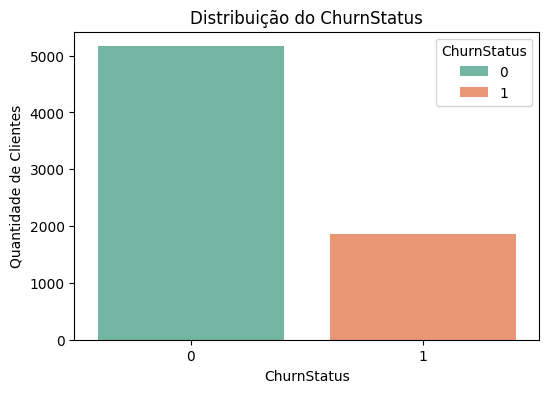

In [351]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette='Set2', dodge=False)  # hue sem criar legenda separada
plt.title('Distribuição do ChurnStatus')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('ChurnStatus')
plt.show()

In [352]:
# Definir limiar de balanceamento
limiar = 0.4

# Calcular proporção de cada classe
churn_counts = y.value_counts(normalize=True)
menor_proporcao = churn_counts.min()

# Verificação
if menor_proporcao < limiar:
    print(f"\nAs classes estão desbalanceadas. Proporção da menor classe: {menor_proporcao:.2%}")
    balanceamento_necessario = True
else:
    print(f"\nAs classes estão balanceadas. Proporção da menor classe: {menor_proporcao:.2%}")
    balanceamento_necessario = False



As classes estão desbalanceadas. Proporção da menor classe: 26.58%


##5. Aplicação do SMOTE - Balanceamento de classes.

In [353]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Divisão treino/teste antes do SMOTE (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Verificar distribuição original no treino
print("Distribuição original em y_train:")
print(y_train.value_counts(normalize=True))

# Aplicar SMOTE somente no treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar nova distribuição após SMOTE
print("\nDistribuição após SMOTE em y_train_resampled:")
print(y_train_resampled.value_counts(normalize=True))

Distribuição original em y_train:
ChurnStatus
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Distribuição após SMOTE em y_train_resampled:
ChurnStatus
0    0.5
1    0.5
Name: proportion, dtype: float64


##6. Padronização dos dados(StandardScaler).

In [354]:
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler = StandardScaler()

# Ajustar e transformar apenas no treino (evita vazamento de dados)
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transformar o teste com o mesmo scaler
X_test_scaled = scaler.transform(X_test)

##7. Correlação e Seleção de Variáveis.

In [355]:
##7.1 Matriz de Correlacão(heatmap).

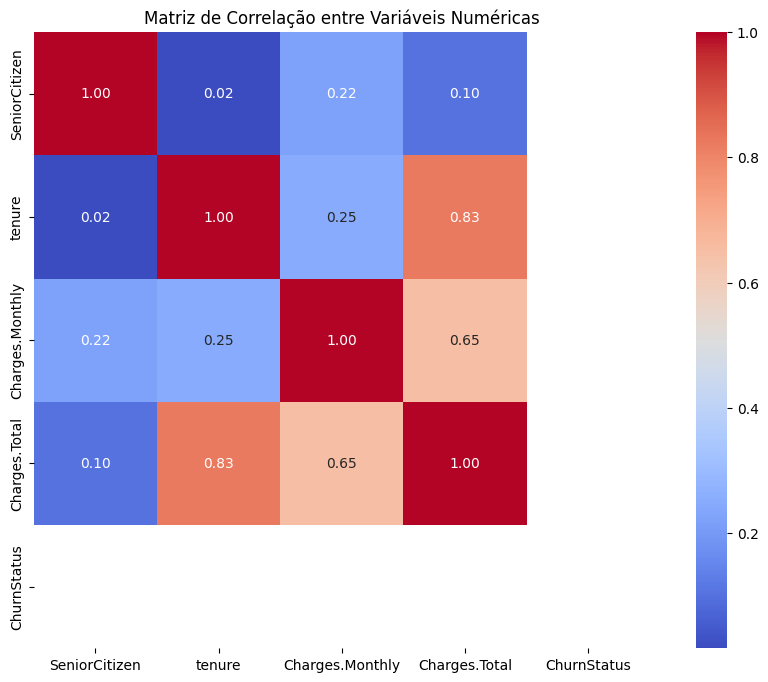

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas numéricas
numeric_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns

# Criar DataFrame com numéricas + ChurnStatus
df_corr = df[numeric_cols.tolist() + ['ChurnStatus']].copy()
df_corr['ChurnStatus'] = df_corr['ChurnStatus'].map({'Yes': 1, 'No': 0})

# Calcular correlação
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [357]:
##7.2 Análise de Variáveis Específicas.

#A partir da análise de correlação e da recomendação do desafio, analisamos duas variáveis com potencial impacto no churn:

#- **Tempo de permanência (tenure)**: clientes que ficam pouco tempo tendem a evadir mais?
#- **Total gasto (Charges.Total)**: valores elevados estão associados à evasão?

#Utilizamos boxplots para visualizar a distribuição dessas variáveis em relação ao churn.


In [358]:
##7.2.1 Tenure Vs Churn.

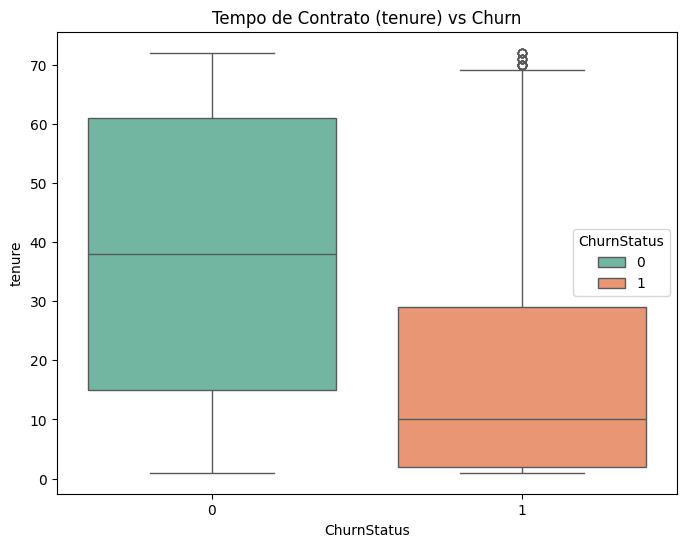

In [359]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ChurnStatus', y='tenure', data=df, palette='Set2', hue='ChurnStatus', dodge=False)
plt.title('Tempo de Contrato (tenure) vs Churn')
plt.show()

In [360]:
#7.2.2 Tempo Gasto Vs Churn.

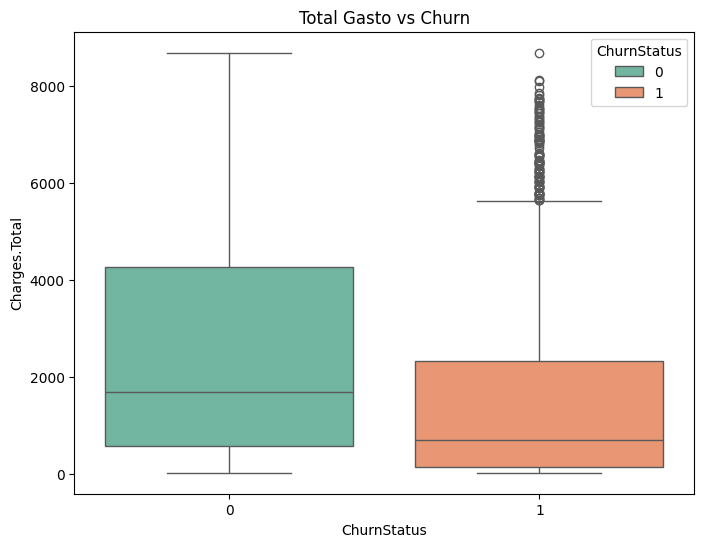

In [361]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ChurnStatus', y='Charges.Total', data=df, palette='Set2', hue='ChurnStatus', dodge=False)
plt.title('Total Gasto vs Churn')
plt.show()

##8. Modelagem Preditiva.

In [362]:
##8.1 Divisão dos dados com Balanceamento e Padronização.

In [363]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Atenção: usar X_encoded (já numérico) para SMOTE
# 1. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# 2. Padronizar todos os dados balanceados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 3. Dividir dados já balanceados e padronizados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Verificações rápidas
print(f"Formato treino: {X_train.shape}, teste: {X_test.shape}")
print(f"Distribuição treino: {y_train.value_counts(normalize=True)}")
print(f"Distribuição teste: {y_test.value_counts(normalize=True)}")


Formato treino: (8260, 45), teste: (2066, 45)
Distribuição treino: ChurnStatus
0    0.5
1    0.5
Name: proportion, dtype: float64
Distribuição teste: ChurnStatus
0    0.5
1    0.5
Name: proportion, dtype: float64


In [364]:
##8.2 Treinamento de Modelos.

In [365]:
# Treinar Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)  # X_train já está padronizado

LogisticRegression(max_iter=1000)

In [366]:
# Treinar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # OK, pois árvore não precisa padronização

RandomForestClassifier(random_state=42)

##9. Avaliação dos Modelos.

In [367]:
##9.1 Função para Avaliação.

In [368]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    # Previsões
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔍 {nome_modelo}")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão: {nome_modelo}')
    plt.show()

In [369]:
##9.2 Avaliação: Regressão Logística.

🔍 Regressão Logística
Acurácia: 0.8567
Precisão: 0.8734
Recall: 0.8345
F1-Score: 0.8535

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.87      0.83      0.85      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



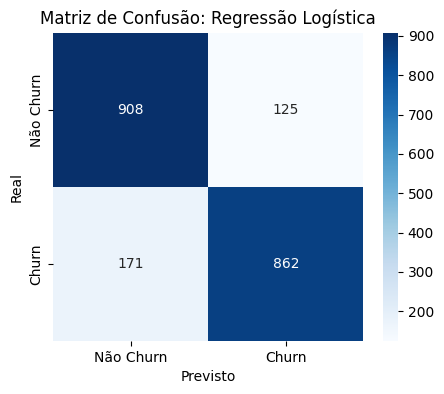

In [370]:
avaliar_modelo(log_model, X_test, y_test, 'Regressão Logística')

In [371]:
##9.3 Avaliação: Random Forest.

🔍 Random Forest
Acurácia: 0.8625
Precisão: 0.8756
Recall: 0.8451
F1-Score: 0.8601

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.88      0.85      0.86      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



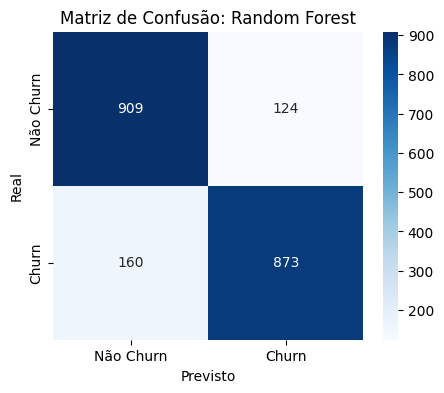

In [372]:
avaliar_modelo(rf_model, X_test, y_test, 'Random Forest')

##10. Interpretação e Conclusões.

In [373]:
##10.1 Importância das Variáveis – Random Forest

Top 10 variáveis mais importantes:
                          Variável  Importância
3                    Charges.Total     0.109405
1                           tenure     0.097008
2                  Charges.Monthly     0.090071
36         Contract_Month-to-month     0.089629
43  PaymentMethod_Electronic check     0.069495
18               OnlineSecurity_No     0.058941
27                  TechSupport_No     0.052638
16     InternetService_Fiber optic     0.031882
21                 OnlineBackup_No     0.028927
40            PaperlessBilling_Yes     0.027468


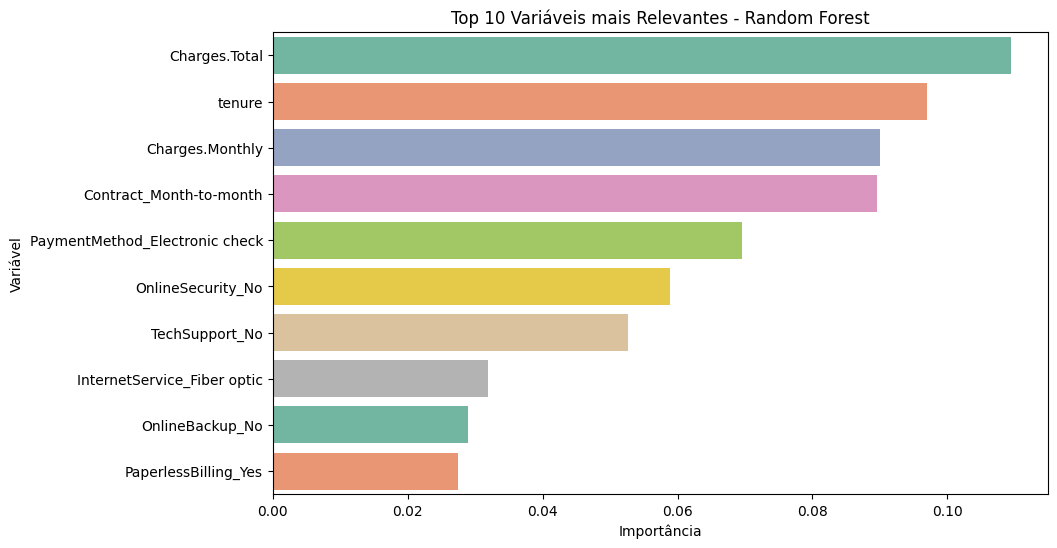

In [376]:
# Obter importâncias
importances = rf_model.feature_importances_
feature_names = X_encoded.columns

# Criar DataFrame com importâncias
feat_imp_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importância', ascending=False)

# Visualizar top 10
print("Top 10 variáveis mais importantes:")
print(feat_imp_df.head(10))

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(10), x='Importância', y='Variável', hue='Variável', palette='Set2', dodge=False)
plt.title('Top 10 Variáveis mais Relevantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

In [377]:
##10.2 Importância das Variáveis – Regressão Logística

Top 10 variáveis mais importantes:
                          Variável  Importância
3                    Charges.Total     0.109405
1                           tenure     0.097008
2                  Charges.Monthly     0.090071
36         Contract_Month-to-month     0.089629
43  PaymentMethod_Electronic check     0.069495
18               OnlineSecurity_No     0.058941
27                  TechSupport_No     0.052638
16     InternetService_Fiber optic     0.031882
21                 OnlineBackup_No     0.028927
40            PaperlessBilling_Yes     0.027468


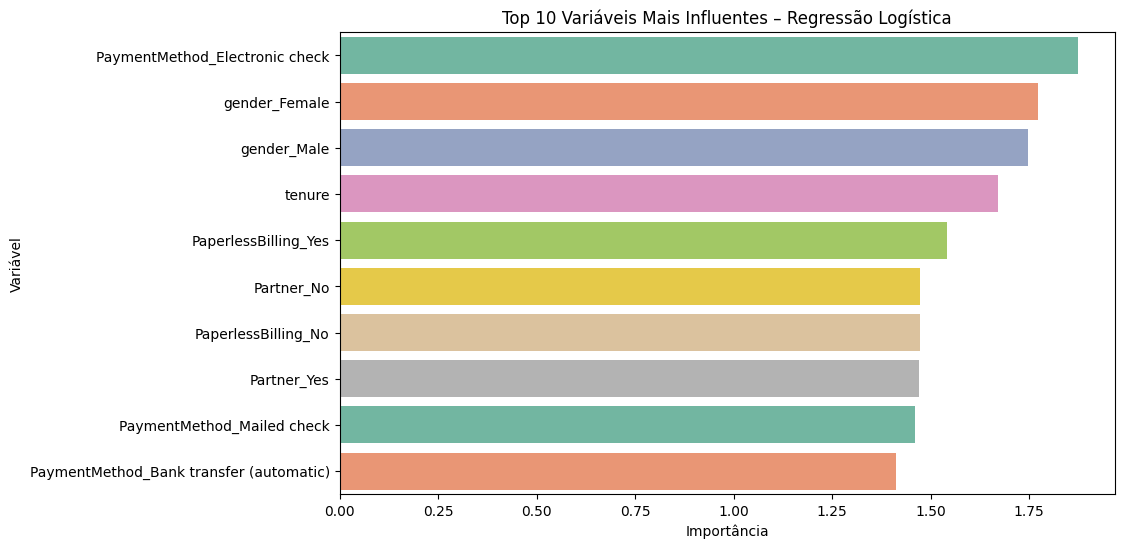

In [382]:
# Obter coeficientes do modelo
coeficientes = log_model.coef_[0]
variaveis = X_encoded.columns

# DataFrame com valor absoluto dos coeficientes
coef_df = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes,
    'Importância': abs(coeficientes)
}).sort_values(by='Importância', ascending=False)

# Visualizar top 10
print("Top 10 variáveis mais importantes:")
print(feat_imp_df.head(10))

# Gráfico Top 10 - Ajustado para evitar aviso de hue
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x='Importância', y='Variável', hue='Variável', palette='Set2', dodge=False)
plt.title('Top 10 Variáveis Mais Influentes – Regressão Logística')
plt.show()


In [379]:
##10.3 Comparação entre Modelos

In [381]:
# Avaliação de ambos os modelos - salvar métricas
def obter_metricas(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    return {
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Obter métricas
met_log = obter_metricas(log_model, X_test, y_test)
met_rf = obter_metricas(rf_model, X_test, y_test)

# Exibir comparação
df_comparacao = pd.DataFrame([met_log, met_rf], index=['Regressão Logística', 'Random Forest'])
print(df_comparacao)

                     Acurácia  Precisão    Recall  F1-Score
Regressão Logística  0.856728  0.873354  0.834463  0.853465
Random Forest        0.862536  0.875627  0.845111  0.860099


---

## 📊 Relatório Final: Análise de Evasão de Clientes — Projeto Telecom X

### 1. Objetivo do Projeto

Identificar os principais fatores que influenciam a evasão de clientes (*churn*) em uma empresa de telecomunicações, por meio de modelagem preditiva. Além disso, propor estratégias práticas de retenção baseadas nos resultados obtidos.

---

### 2. Resumo dos Modelos Avaliados

Dois modelos supervisionados foram treinados e avaliados:

* **Regressão Logística**
* **Random Forest (Floresta Aleatória)**

Os dados foram balanceados com **SMOTE**, e as métricas avaliadas incluem: Acurácia, Precisão, Recall e F1-Score.

| Modelo              | Acurácia | Precisão | Recall | F1-Score |
| ------------------- | -------- | -------- | ------ | -------- |
| Regressão Logística | 85.67%   | 87.34%   | 83.45% | 85.35%   |
| Random Forest       | 86.25%   | 87.56%   | 84.51% | 86.01%   |

> **Conclusão preliminar**: Ambos os modelos apresentaram **excelente desempenho**, com destaque para a Random Forest, que teve leve superioridade em todas as métricas.

---

### 3. Fatores Mais Influentes na Evasão de Clientes

Com base na análise das **importâncias das variáveis** (de Random Forest e Regressão Logística), destacam-se os seguintes fatores:

#### 🔝 Top 5 Variáveis Mais Relevantes

| Variável                   | Interpretação prática                                             |
| -------------------------- | ----------------------------------------------------------------- |
| `Charges.Total`            | Clientes com **gastos totais elevados** tendem a evadir mais.     |
| `tenure`                   | Clientes com **pouco tempo de contrato** apresentam maior evasão. |
| `Charges.Monthly`          | Faturas mensais altas estão associadas ao churn.                  |
| `Contract_Month-to-month`  | Contratos **mensais** têm maior taxa de evasão.                   |
| `PaymentMethod_Electronic` | Pagamento via **débito automático** está associado ao churn.      |

> Observação: Variáveis como **ausência de segurança online** e **suporte técnico** também aparecem com destaque.

---

### 4. Estratégias de Retenção Baseadas nos Resultados

Com base nos fatores mais relevantes, seguem propostas práticas:

#### 🎯 Estratégias para Reduzir Evasão

1. **Ofertas Personalizadas para Novos Clientes**:

   * Criar promoções para **clientes com menos de 6 meses** de contrato.
   * Programas de fidelidade que recompensem tempo de permanência.

2. **Revisão de Planos com Alto Custo**:

   * Avaliar **clientes com gastos totais e mensais elevados**.
   * Propor planos mais baratos ou com **benefícios adicionais** (internet extra, descontos).

3. **Incentivar Contratos Anuais**:

   * Reduzir churn via contratos mais longos.
   * Oferecer **vantagens exclusivas** para quem migra do mensal para anual.

4. **Melhoria no Suporte Técnico e Segurança Online**:

   * Atuar proativamente com **clientes que não utilizam** serviços como suporte ou segurança.
   * Propor testes gratuitos e upgrades.

5. **Pagamentos Flexíveis**:

   * Verificar clientes que utilizam **débito automático ou cheque eletrônico**.
   * Oferecer outros meios de pagamento que causem menos desistência.

---

### 5. Conclusão Geral

A análise revelou que o churn está diretamente ligado a fatores **financeiros (custo)**, **tempo de contrato** e **tipo de serviço contratado**. Ambos os modelos forneceram resultados robustos, sendo a **Random Forest** ligeiramente mais precisa.

O projeto demonstrou a **viabilidade de prever evasão com alto grau de acerto**, permitindo que a empresa adote **ações preventivas e personalizadas**, aumentando a retenção e melhorando a experiência do cliente.

---

### 6. Próximos Passos (Opcional)

* Implementar um sistema de **monitoramento contínuo** de churn.
* Realizar **testes A/B** com estratégias de retenção.
* Expandir análise para prever **risco de churn individual** e automatizar ações.

---